<a href="https://colab.research.google.com/github/BrianWengier/CAP4630/blob/master/hw2/AIHW2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.datasets import cifar10

import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Underfit Model:

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 10s 202us/sample - loss: 1.8966 - acc: 0.3196 - val_loss: 1.7416 - val_acc: 0.3813
Epoch 2/20
50000/50000 [==============================] - 10s 194us/sample - loss: 1.7391 - acc: 0.3781 - val_loss: 1.6752 - val_acc: 0.4058
Epoch 3/20
50000/50000 [==============================] - 10s 194us/sample - loss: 1.6861 - acc: 0.3988 - val_loss: 1.7041 - val_acc: 0.3909
Epoch 4/20
50000/50000 [==============================] - 10s 197us/sample - loss: 1.6604 - acc: 0.4110 - val_loss: 1.6480 - val_acc: 0.4102
Epoch 5/20
50000/50000 [==============================] - 10s 191us/sample - loss: 1.6339 - acc: 0.4193 - val_loss: 1.6289 - val_acc: 0.4224
Epoch 6/20
50000/50000 [==============================] - 10s 196us/sample - loss: 1.6196 - acc: 0.4245 - val_loss: 1.6416 - val_acc: 0.4140
Epoch 7/20
50000/50000 [==============================] - 10s 197us/sample - loss: 1.6012 - acc: 0.4323 

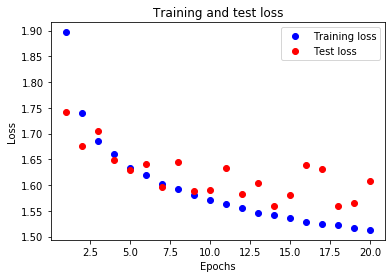

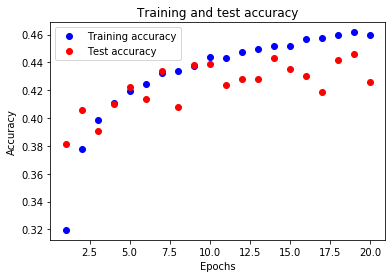

In [32]:
# set up the layers

model = keras.Sequential([
    
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Overfit Model:

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 101s 2ms/sample - loss: 1.4636 - acc: 0.4626 - val_loss: 1.1857 - val_acc: 0.5731
Epoch 2/20
50000/50000 [==============================] - 100s 2ms/sample - loss: 1.0657 - acc: 0.6202 - val_loss: 1.0857 - val_acc: 0.6164
Epoch 3/20
50000/50000 [==============================] - 100s 2ms/sample - loss: 0.8811 - acc: 0.6901 - val_loss: 0.9388 - val_acc: 0.6722
Epoch 4/20
50000/50000 [==============================] - 100s 2ms/sample - loss: 0.7549 - acc: 0.7343 - val_loss: 0.8877 - val_acc: 0.6940
Epoch 5/20
50000/50000 [==============================] - 100s 2ms/sample - loss: 0.6413 - acc: 0.7733 - val_loss: 0.8658 - val_acc: 0.7074
Epoch 6/20
50000/50000 [==============================] - 100s 2ms/sample - loss: 0.5457 - acc: 0.8073 - val_loss: 0.8956 - val_acc: 0.7163
Epoch 7/20
50000/50000 [==============================] - 100s 2ms/sample - loss: 0.4483 - acc: 0.8385 - val_l

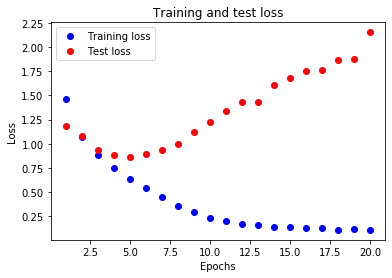

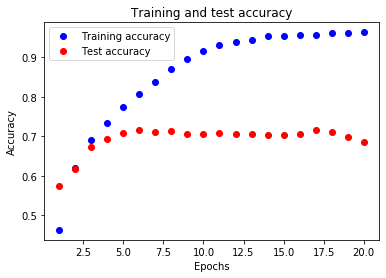

In [33]:
# set up the layers

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),

    keras.layers.Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    keras.layers.Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Good Model:

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 110s 2ms/sample - loss: 1.5718 - acc: 0.4227 - val_loss: 1.2264 - val_acc: 0.5584
Epoch 2/20
50000/50000 [==============================] - 110s 2ms/sample - loss: 1.2258 - acc: 0.5622 - val_loss: 1.0535 - val_acc: 0.6207
Epoch 3/20
50000/50000 [==============================] - 110s 2ms/sample - loss: 1.0837 - acc: 0.6132 - val_loss: 0.9907 - val_acc: 0.6532
Epoch 4/20
50000/50000 [==============================] - 110s 2ms/sample - loss: 0.9897 - acc: 0.6488 - val_loss: 0.9243 - val_acc: 0.6698
Epoch 5/20
50000/50000 [==============================] - 111s 2ms/sample - loss: 0.9141 - acc: 0.6754 - val_loss: 0.8904 - val_acc: 0.6856
Epoch 6/20
50000/50000 [==============================] - 110s 2ms/sample - loss: 0.8540 - acc: 0.6991 - val_loss: 0.8793 - val_acc: 0.6921
Epoch 7/20
50000/50000 [==============================] - 111s 2ms/sample - loss: 0.8052 - acc: 0.7139 - val_l

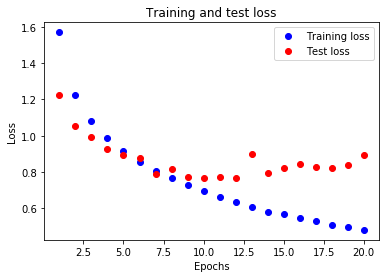

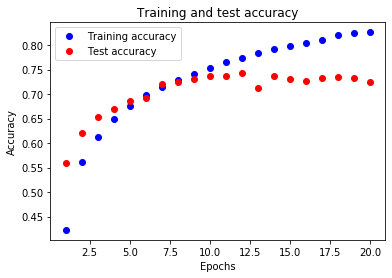

In [34]:
# set up the layers

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()